In [23]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [24]:
df = pd.read_csv('C:/Users/laxmi/OneDrive/Documents/telecom churn  project/telecom_churn.csv')
df.head(10)

,customer_id,telecom_partner,gender,age,state,city,pincode,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
0,1,Reliance Jio,F,25,Karnataka,Kolkata,755597,1/1/2020,4,124962,44,45,-361,0
1,2,Reliance Jio,F,55,Mizoram,Mumbai,125926,1/1/2020,2,130556,62,39,5973,0
2,3,Vodafone,F,57,Arunachal Pradesh,Delhi,423976,1/1/2020,0,148828,49,24,193,1
3,4,BSNL,M,46,Tamil Nadu,Kolkata,522841,1/1/2020,1,38722,80,25,9377,1
4,5,BSNL,F,26,Tripura,Delhi,740247,1/1/2020,2,55098,78,15,1393,0
5,6,Vodafone,M,36,Uttarakhand,Chennai,120612,1/1/2020,1,73452,91,24,8109,0
6,7,BSNL,F,60,Karnataka,Delhi,609616,1/1/2020,1,110035,36,13,8512,0
7,8,BSNL,M,46,Arunachal Pradesh,Kolkata,866786,1/1/2020,4,104541,87,40,2245,1
8,9,Reliance Jio,F,53,Himachal Pradesh,Mumbai,765257,1/1/2020,2,79439,34,12,10039,0
9,10,BSNL,F,57,Rajasthan,Mumbai,506308,1/1/2020,0,126422,61,33,567,0


In [25]:
df.shape

(243553, 14)

In [26]:
df.columns.values

array(['customer_id', 'telecom_partner', 'gender', 'age', 'state', 'city',
       'pincode', 'date_of_registration', 'num_dependents',
       'estimated_salary', 'calls_made', 'sms_sent', 'data_used', 'churn'],
      dtype=object)

In [27]:
df. isna(). sum()

customer_id             0
telecom_partner         0
gender                  0
age                     0
state                   0
city                    0
pincode                 0
date_of_registration    0
num_dependents          0
estimated_salary        0
calls_made              0
sms_sent                0
data_used               0
churn                   0
dtype: int64

In [28]:
df.describe()

,customer_id,age,pincode,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
count,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000
mean,121777.000000,46.077609,549501.270541,1.997500,85021.137839,49.010548,23.945404,4993.186025,0.200478
std,70307.839393,16.444029,259808.860574,1.414941,37508.963233,29.453556,14.733575,2942.019547,0.400359
min,1.000000,18.000000,100006.000000,0.000000,20000.000000,-10.000000,-5.000000,-987.000000,0.000000
25%,60889.000000,32.000000,324586.000000,1.000000,52585.000000,24.000000,11.000000,2490.000000,0.000000
50%,121777.000000,46.000000,548112.000000,2.000000,84990.000000,49.000000,24.000000,4987.000000,0.000000
75%,182665.000000,60.000000,774994.000000,3.000000,117488.000000,74.000000,36.000000,7493.000000,0.000000
max,243553.000000,74.000000,999987.000000,4.000000,149999.000000,108.000000,53.000000,10991.000000,1.000000


In [29]:
df['churn'] . value_counts()

churn
0    194726
1     48827
Name: count, dtype: int64

<Axes: xlabel='gender', ylabel='count'>

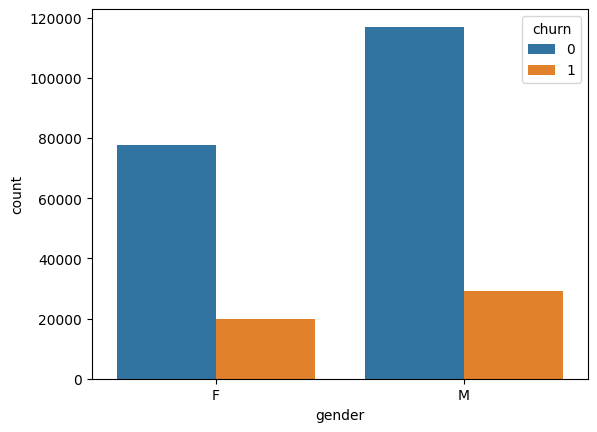

In [30]:
sns.countplot(x='gender', hue= 'churn', data = df)

array([[<Axes: title={'center': 'customer_id'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'pincode'}>],
       [<Axes: title={'center': 'num_dependents'}>,
        <Axes: title={'center': 'estimated_salary'}>,
        <Axes: title={'center': 'calls_made'}>],
       [<Axes: title={'center': 'sms_sent'}>,
        <Axes: title={'center': 'data_used'}>,
        <Axes: title={'center': 'churn'}>]], dtype=object)

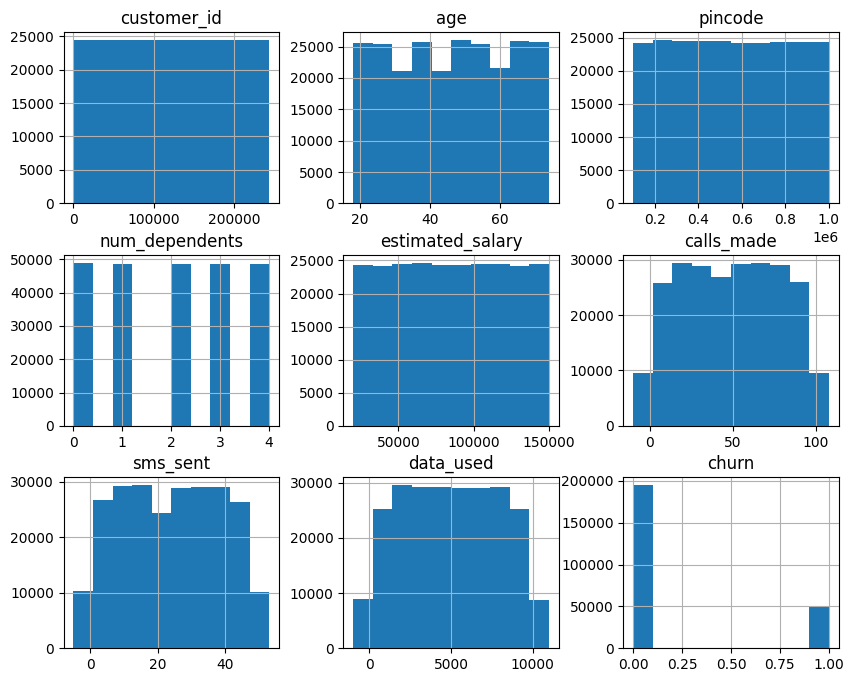

In [31]:
df.hist(figsize=(10, 8))  

In [14]:
df.isnull().sum() 

customer_id             0
telecom_partner         0
gender                  0
age                     0
state                   0
city                    0
pincode                 0
date_of_registration    0
num_dependents          0
estimated_salary        0
calls_made              0
sms_sent                0
data_used               0
churn                   0
dtype: int64

In [15]:
Q1 = df["estimated_salary"].quantile(0.25)
Q3 = df["estimated_salary"].quantile(0.75)
IQR = Q3 - Q1
df = df[(df["estimated_salary"] >= Q1 - 1.5 * IQR) & (df["estimated_salary"] <= Q3 + 1.5 * IQR)]


In [16]:
df["date_of_registration"] = pd.to_datetime(df["date_of_registration"])
df["state"] = df["state"].astype("category")


In [17]:
df["new_feature"] = df["calls_made"] * df["sms_sent"]

In [18]:
df = pd.get_dummies(df, columns=["state"])

In [19]:
df.to_csv("cleaned_data.csv", index=False)

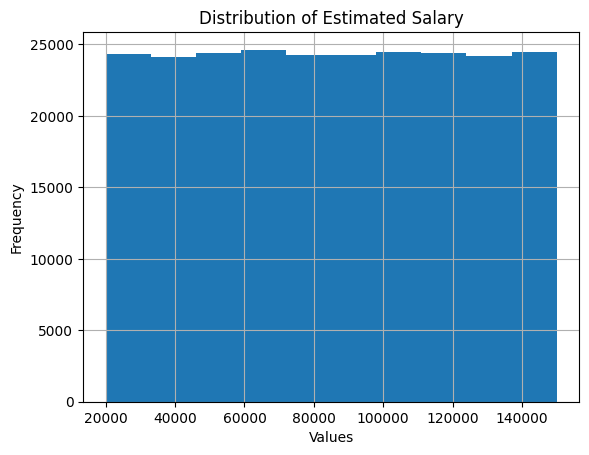

In [22]:
df["estimated_salary"].hist()
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Distribution of Estimated Salary")
plt.show()